In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/zomato/zomato.csv')

df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import os
%matplotlib inline
os.makedirs('plots', exist_ok=True)

df = pd.read_csv('/kaggle/input/zomato/zomato.csv', encoding='latin-1')
print("Shape:", df.shape)
df.head()


Shape: (56252, 13)


,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [4]:
df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]
print(df.info())
display(df.isnull().sum().sort_values(ascending=False).head(12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for_two_people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

dish_liked                     28225
rate                            7838
listed_in(type)                 4610
phone                           1296
approx_cost(for_two_people)      521
rest_type                        338
cuisines                         203
location                         126
votes                             78
book_table                        58
online_order                      19
address                           17
dtype: int64

In [10]:
if 'rate' in df.columns:
    df['rate'] = df['rate'].replace('NEW', np.nan)
    df['rate'] = df['rate'].astype(str).str.replace('/5', '')
    df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Clean 'votes' column
if 'votes' in df.columns:
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Describe only existing columns
columns_to_describe = [col for col in ['rate', 'votes'] if col in df.columns]
print(df[columns_to_describe].describe())


               rate         votes
count  41665.000000  51717.000000
mean       3.700449    283.697527
std        0.440513    803.838853
min        1.800000      0.000000
25%        3.400000      7.000000
50%        3.700000     41.000000
75%        4.000000    198.000000
max        4.900000  16832.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


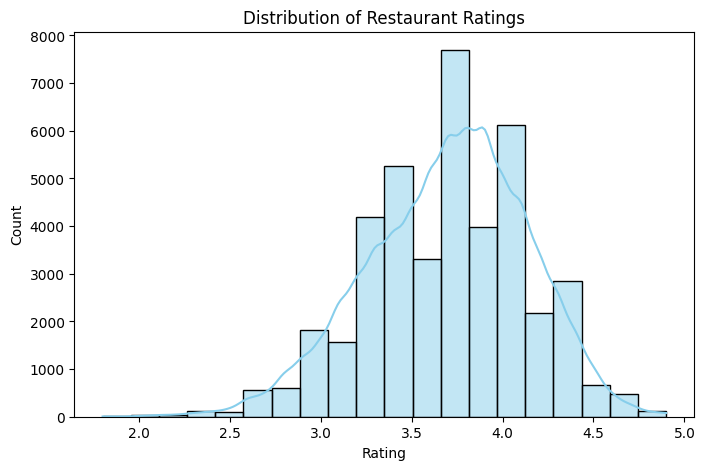

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['rate'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


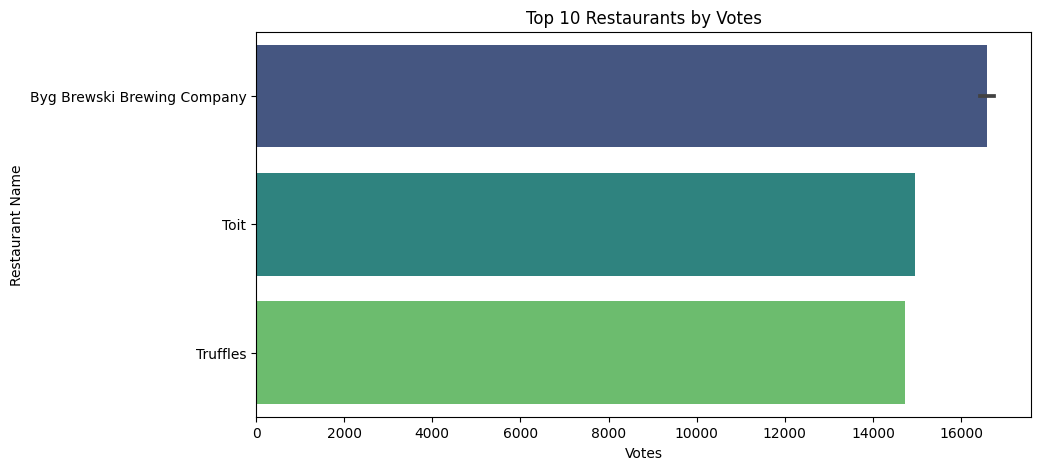

In [12]:
top_votes = df[['name','votes']].sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='votes', y='name', data=top_votes, palette='viridis')
plt.title('Top 10 Restaurants by Votes')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.show()

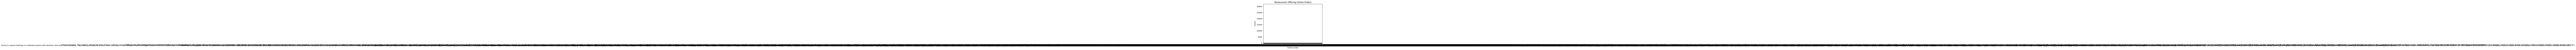

In [14]:
online_counts = df['online_order'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=online_counts.index, y=online_counts.values, palette='pastel')
plt.title('Restaurants Offering Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

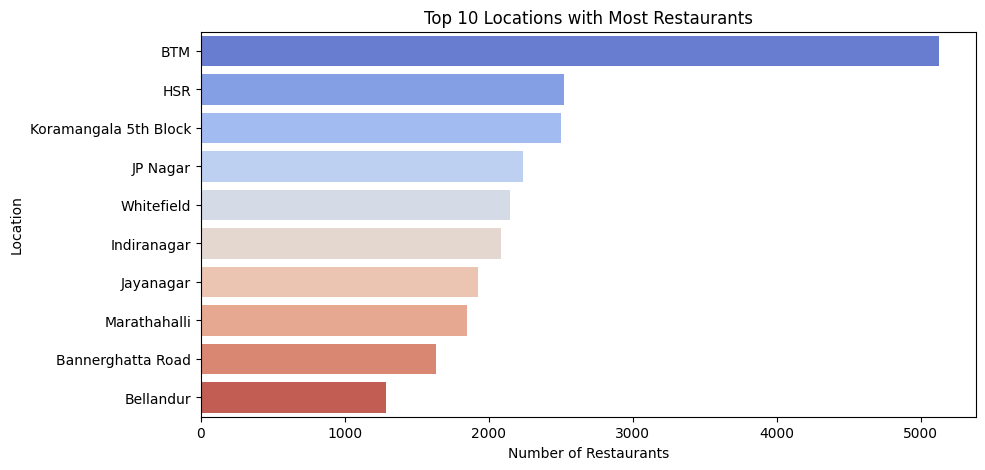

In [15]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()